# Mini Project - Algorithmic Trading with DQL and LSTM


This project delves into the application of advanced machine learning techniques in the realm of algorithmic trading, with a particular emphasis on Deep Q-Learning (DQL). DQL, a reinforcement learning algorithm, is utilized to develop a trading strategy that learns optimal trading actions by interacting with the stock market environment. This approach allows the model to make decisions that maximize cumulative rewards over time.

The project also incorporates Long Short-Term Memory (LSTM) networks to enhance the predictive capabilities for stock prices, but the primary focus remains on the application of DQL. By examining time series data from technology stocks like Apple, Amazon, Google, and Microsoft, the project demonstrates how to gather, analyze, and visualize stock market data using the yfinance library. Additionally, it assesses risk and attempts to predict future stock prices, providing a comprehensive toolkit for algorithmic trading.



## Getting the Data
The data used in this project comes from Yahoo Finance, a comprehensive resource for financial market data and investment information. The project utilizes the yfinance library, a Python interface that allows easy and efficient downloading of historical market data directly from Yahoo Finance. This library provides access to detailed stock information, including historical prices, volumes, and other relevant financial metrics for various technology stocks such as Apple, Amazon, Google, and Microsoft. This data serves as the foundation for the project's analysis, visualization, and predictive modeling efforts.

# 1. What was the change in price of the stock overtime?

In this section we'll go over how to handle requesting stock information with pandas, and how to analyze basic attributes of a stock.

In [1]:
!pip install -q yfinance

In [2]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
plt.style.use("fivethirtyeight")
%matplotlib inline

# For reading stock data from yahoo
from pandas_datareader.data import DataReader
import yfinance as yf
from pandas_datareader import data as pdr

yf.pdr_override()

# For time stamps
from datetime import datetime


# The tech stocks we'll use for this analysis
tech_list = ['AAPL', 'GOOG', 'MSFT', 'AMZN']


end = datetime.now()
start = datetime(end.year - 1, end.month, end.day)

for stock in tech_list:
    globals()[stock] = yf.download(stock, start, end)


company_list = [AAPL, GOOG, MSFT, AMZN]
company_name = ["APPLE", "GOOGLE", "MICROSOFT", "AMAZON"]

for company, com_name in zip(company_list, company_name):
    company["company_name"] = com_name

df = pd.concat(company_list, axis=0)
df.tail(10)

yfinance: pandas_datareader support is deprecated & semi-broken so will be removed in a future verison. Just use yfinance.


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume,company_name
Date,,,,,,,
2024-06-03,177.699997,178.699997,175.919998,178.339996,178.339996,30786600,AMAZON
2024-06-04,177.639999,179.820007,176.440002,179.339996,179.339996,27198400,AMAZON
2024-06-05,180.100006,181.500000,178.750000,181.279999,181.279999,32116400,AMAZON
2024-06-06,181.750000,185.000000,181.490005,185.000000,185.000000,31371200,AMAZON
2024-06-07,184.899994,186.289993,183.360001,184.300003,184.300003,28021500,AMAZON
2024-06-10,184.070007,187.229996,183.789993,187.059998,187.059998,34494500,AMAZON
2024-06-11,187.059998,187.770004,184.539993,187.229996,187.229996,27265100,AMAZON
2024-06-12,188.020004,188.350006,185.429993,186.889999,186.889999,33984200,AMAZON
2024-06-13,186.089996,187.669998,182.669998,183.830002,183.830002,39721500,AMAZON


## Descriptive Statistics about the Data


In [3]:
# Summary Stats
AAPL.describe()

,Open,High,Low,Close,Adj Close,Volume
count,252.000000,252.000000,252.000000,252.000000,252.000000,2.520000e+02
mean,183.139881,184.698730,181.740238,183.262738,182.972454,5.907786e+07
std,9.310035,9.375915,9.287507,9.396388,9.355914,2.176201e+07
min,165.350006,166.399994,164.080002,165.000000,165.000000,2.404830e+07
25%,175.277496,177.052502,173.700005,175.370007,175.038933,4.674302e+07
50%,183.645004,185.119995,182.014999,183.910004,183.519691,5.307365e+07
75%,190.535000,191.912502,189.427494,190.649998,190.190510,6.556422e+07
max,214.740005,220.199997,211.600006,214.240005,214.240005,1.981343e+08


## Information About the Data


In [4]:
# General info
AAPL.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 252 entries, 2023-06-15 to 2024-06-14
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Open          252 non-null    float64
 1   High          252 non-null    float64
 2   Low           252 non-null    float64
 3   Close         252 non-null    float64
 4   Adj Close     252 non-null    float64
 5   Volume        252 non-null    int64  
 6   company_name  252 non-null    object 
dtypes: float64(5), int64(1), object(1)
memory usage: 15.8+ KB


## Closing Price

The closing price is the last price at which the stock is traded during the regular trading day. A stock’s closing price is the standard benchmark used by investors to track its performance over time.

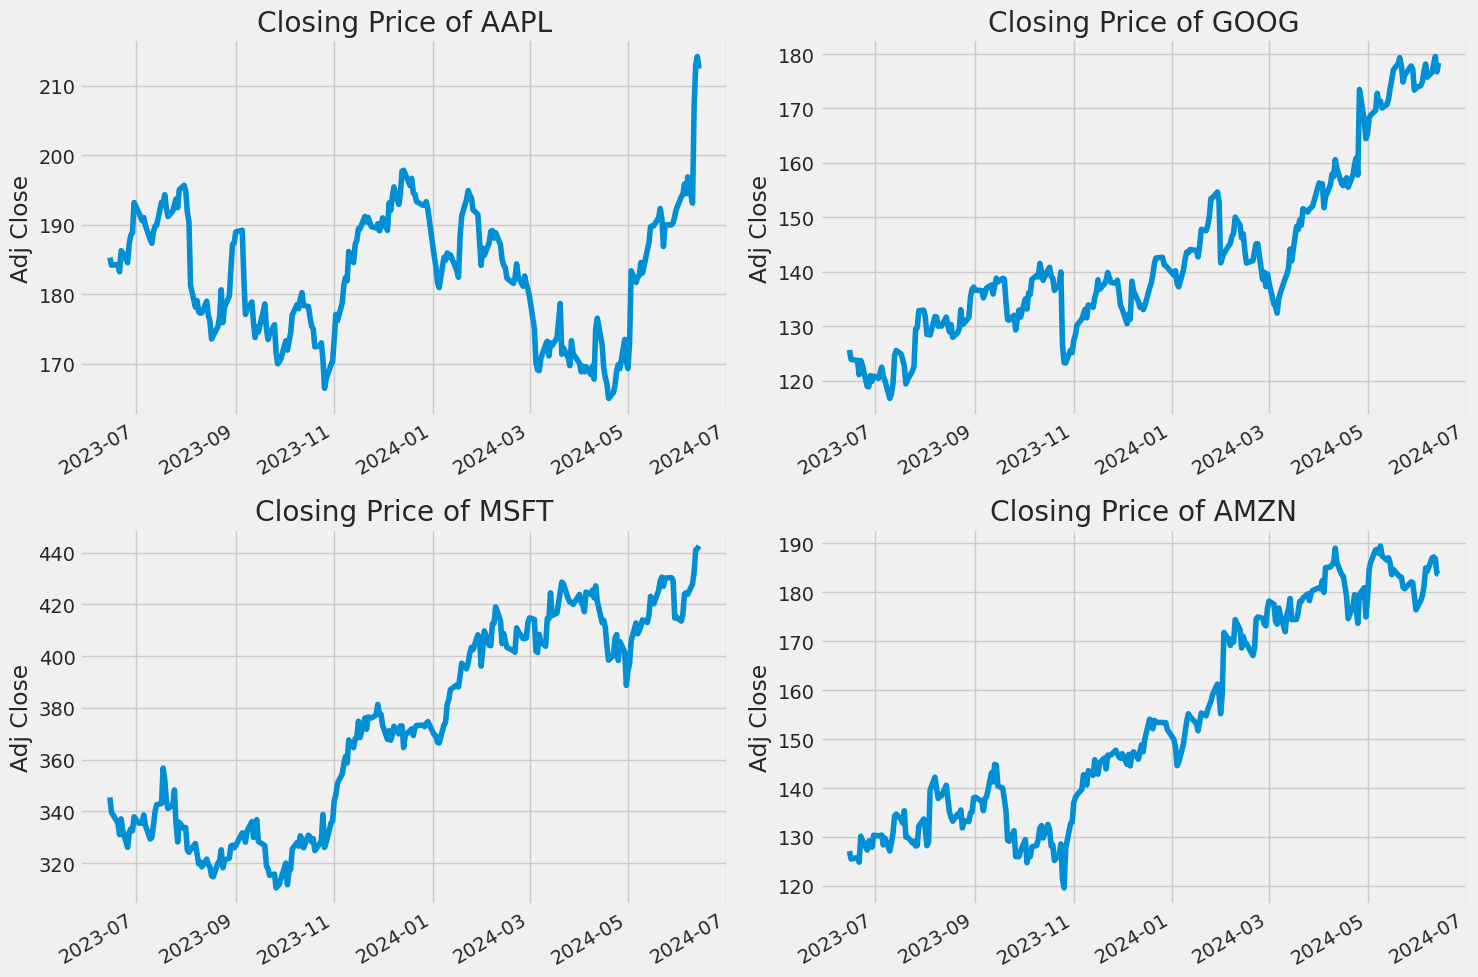

In [5]:
# Let's see a historical view of the closing price
plt.figure(figsize=(15, 10))
plt.subplots_adjust(top=1.25, bottom=1.2)

for i, company in enumerate(company_list, 1):
    plt.subplot(2, 2, i)
    company['Adj Close'].plot()
    plt.ylabel('Adj Close')
    plt.xlabel(None)
    plt.title(f"Closing Price of {tech_list[i - 1]}")

plt.tight_layout()

## Volume of Sales
Volume is the amount of an asset or security that changes hands over some period of time, often over the course of a day. For instance, the stock trading volume would refer to the number of shares of security traded between its daily open and close. Trading volume, and changes to volume over the course of time, are important inputs for technical traders.

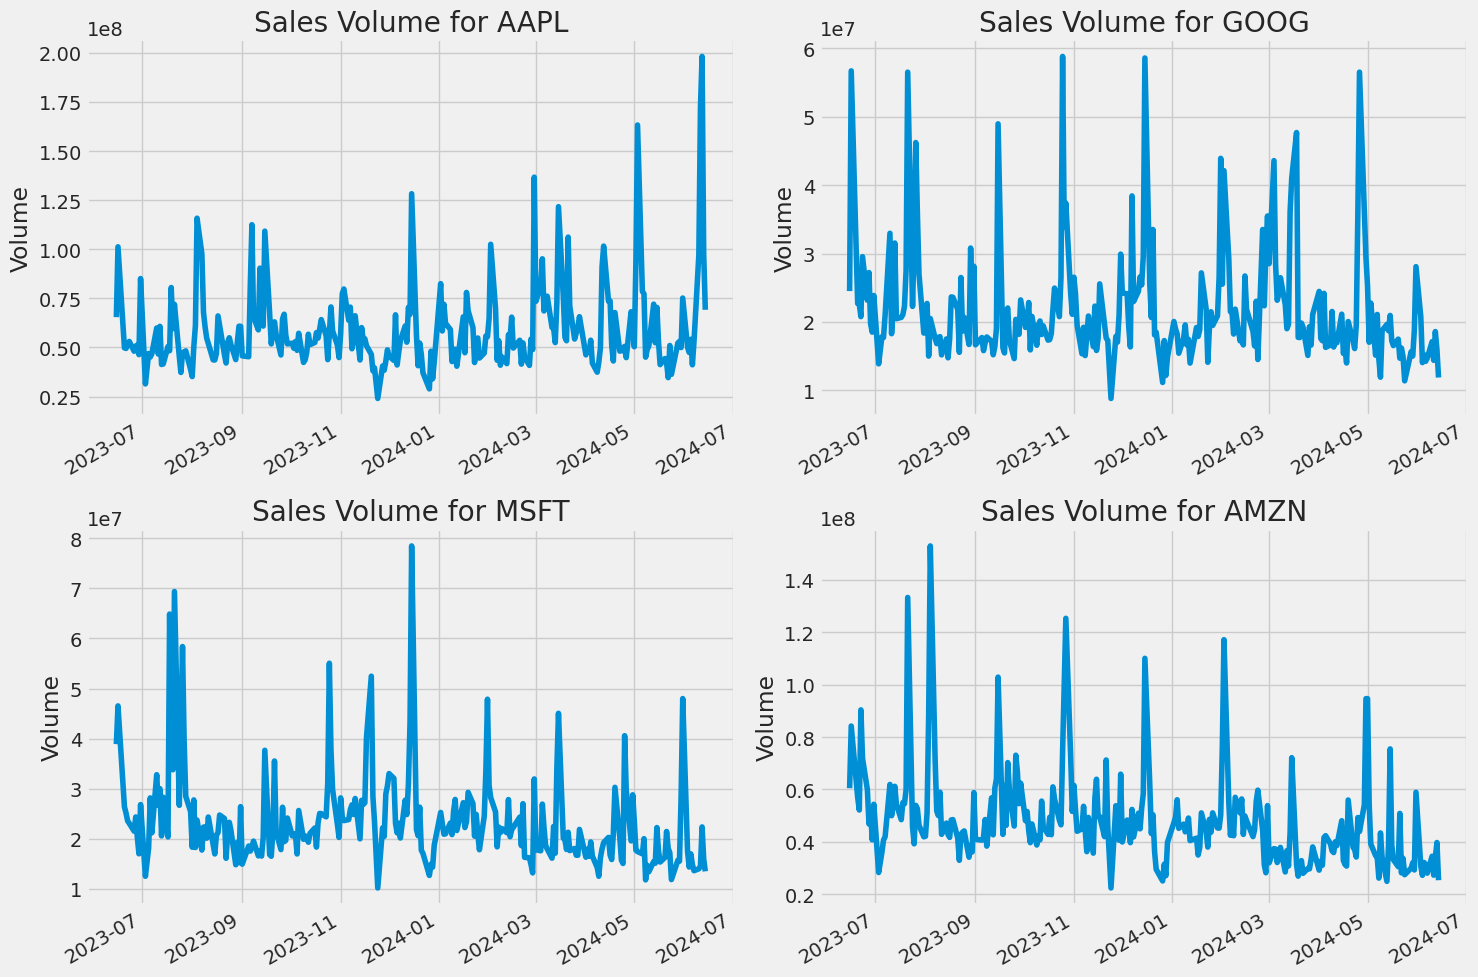

In [6]:
# Now let's plot the total volume of stock being traded each day
plt.figure(figsize=(15, 10))
plt.subplots_adjust(top=1.25, bottom=1.2)

for i, company in enumerate(company_list, 1):
    plt.subplot(2, 2, i)
    company['Volume'].plot()
    plt.ylabel('Volume')
    plt.xlabel(None)
    plt.title(f"Sales Volume for {tech_list[i - 1]}")

plt.tight_layout()

# 2. What was the moving average of the various stocks?

The moving average (MA) is a simple technical analysis tool that smooths out price data by creating a constantly updated average price. The average is taken over a specific period of time, like 10 days, 20 minutes, 30 weeks, or any time period the trader chooses.

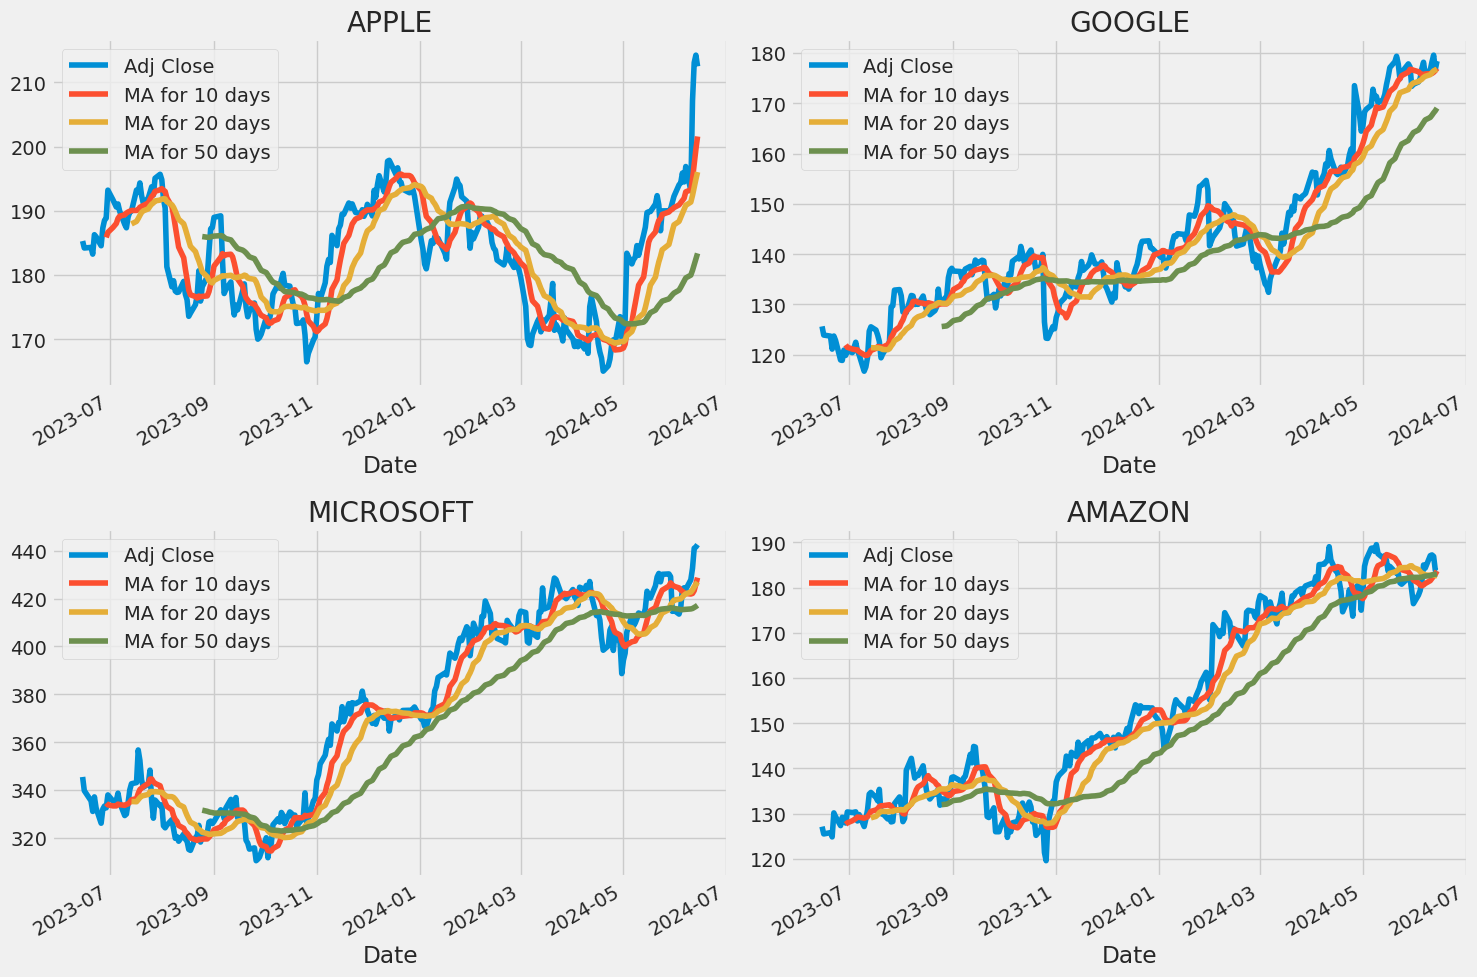

In [7]:
ma_day = [10, 20, 50]

for ma in ma_day:
    for company in company_list:
        column_name = f"MA for {ma} days"
        company[column_name] = company['Adj Close'].rolling(ma).mean()


fig, axes = plt.subplots(nrows=2, ncols=2)
fig.set_figheight(10)
fig.set_figwidth(15)

AAPL[['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[0,0])
axes[0,0].set_title('APPLE')

GOOG[['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[0,1])
axes[0,1].set_title('GOOGLE')

MSFT[['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[1,0])
axes[1,0].set_title('MICROSOFT')

AMZN[['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[1,1])
axes[1,1].set_title('AMAZON')

fig.tight_layout()

# 3. What was the daily return of the stock on average?

Now that we've done some baseline analysis, let's go ahead and dive a little deeper. We're now going to analyze the risk of the stock. In order to do so we'll need to take a closer look at the daily changes of the stock, and not just its absolute value. Let's go ahead and use pandas to retrieve teh daily returns for the Apple stock.

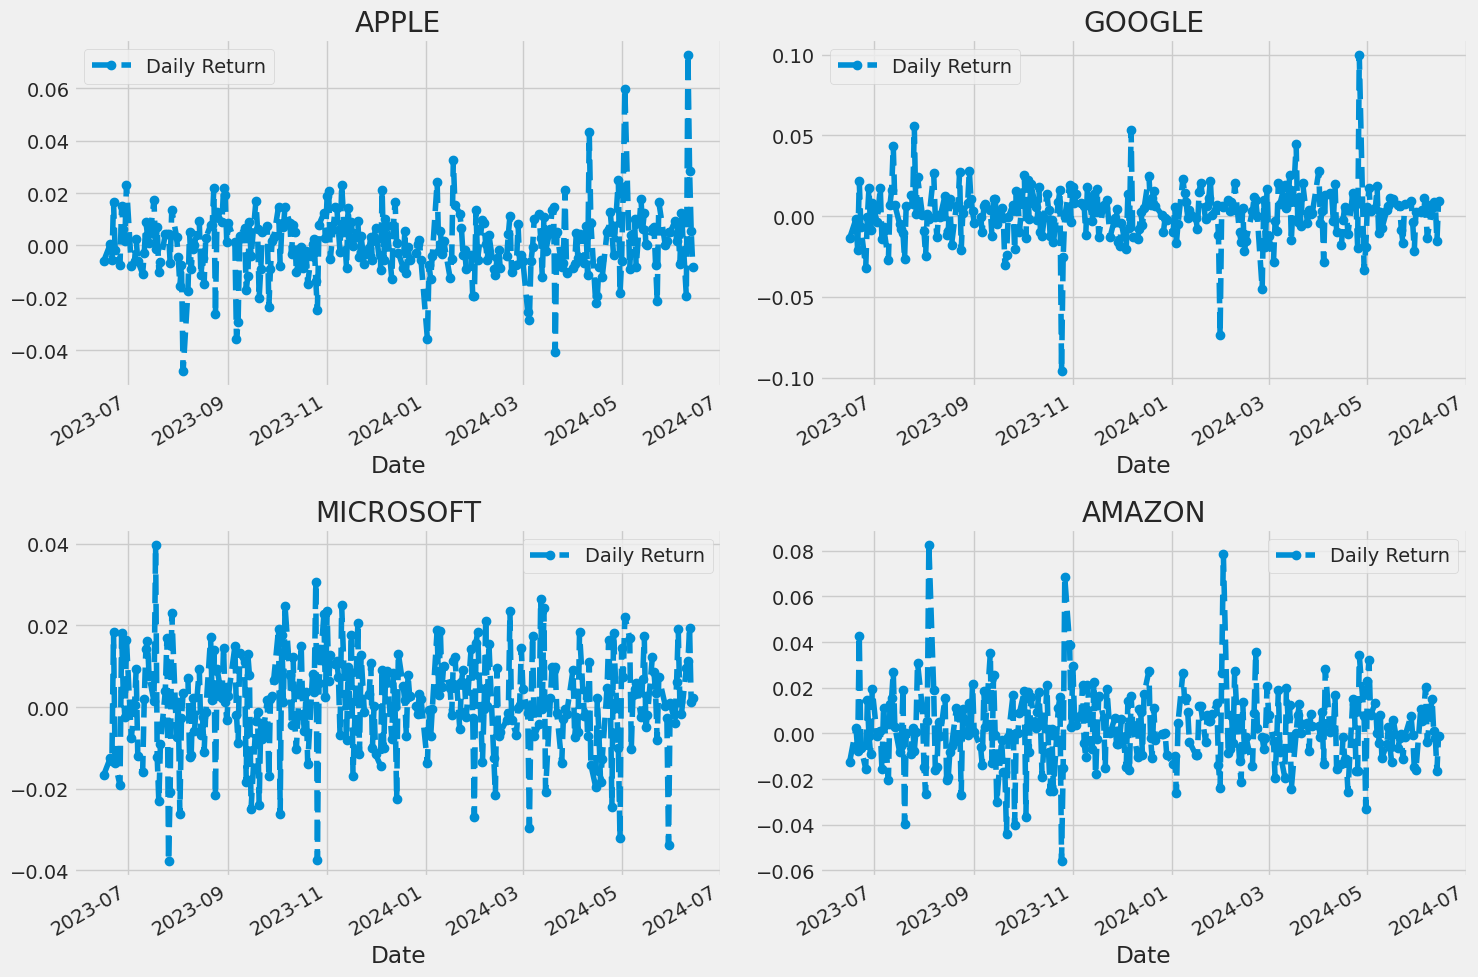

In [8]:
# We'll use pct_change to find the percent change for each day
for company in company_list:
    company['Daily Return'] = company['Adj Close'].pct_change()

# Then we'll plot the daily return percentage
fig, axes = plt.subplots(nrows=2, ncols=2)
fig.set_figheight(10)
fig.set_figwidth(15)

AAPL['Daily Return'].plot(ax=axes[0,0], legend=True, linestyle='--', marker='o')
axes[0,0].set_title('APPLE')

GOOG['Daily Return'].plot(ax=axes[0,1], legend=True, linestyle='--', marker='o')
axes[0,1].set_title('GOOGLE')

MSFT['Daily Return'].plot(ax=axes[1,0], legend=True, linestyle='--', marker='o')
axes[1,0].set_title('MICROSOFT')

AMZN['Daily Return'].plot(ax=axes[1,1], legend=True, linestyle='--', marker='o')
axes[1,1].set_title('AMAZON')

fig.tight_layout()

# 4. What was the correlation between different stocks closing prices?

In [9]:
# Grab all the closing prices for the tech stock list into one DataFrame

closing_df = pdr.get_data_yahoo(tech_list, start=start, end=end)['Adj Close']

# Make a new tech returns DataFrame
tech_rets = closing_df.pct_change()
tech_rets.head()

[*********************100%%**********************]  4 of 4 completed


Ticker,AAPL,AMZN,GOOG,MSFT
Date,,,,
2023-06-15,NaN,NaN,NaN,NaN
2023-06-16,-0.005860,-0.012745,-0.013753,-0.016576
2023-06-20,0.000487,0.002311,-0.001693,-0.012503
2023-06-21,-0.005675,-0.007553,-0.020912,-0.013282
2023-06-22,0.016525,0.042618,0.021524,0.018438


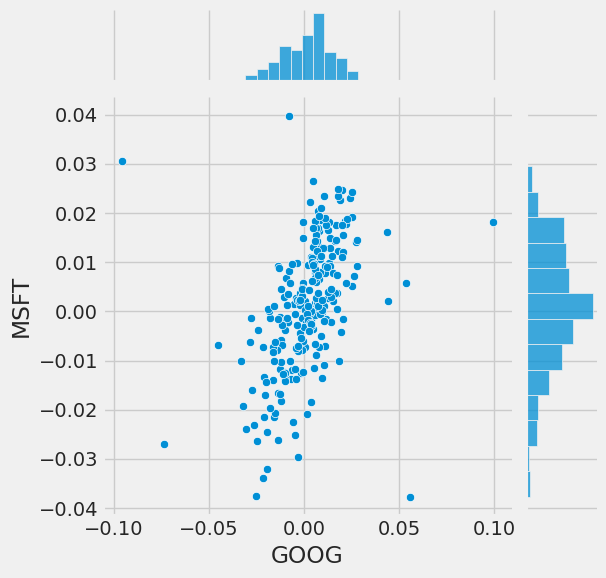

In [10]:
# We'll use joinplot to compare the daily returns of Google and Microsoft
sns.jointplot(x='GOOG', y='MSFT', data=tech_rets, kind='scatter')

We can use sns.pairplot() to automatically create this every possible combination of plots

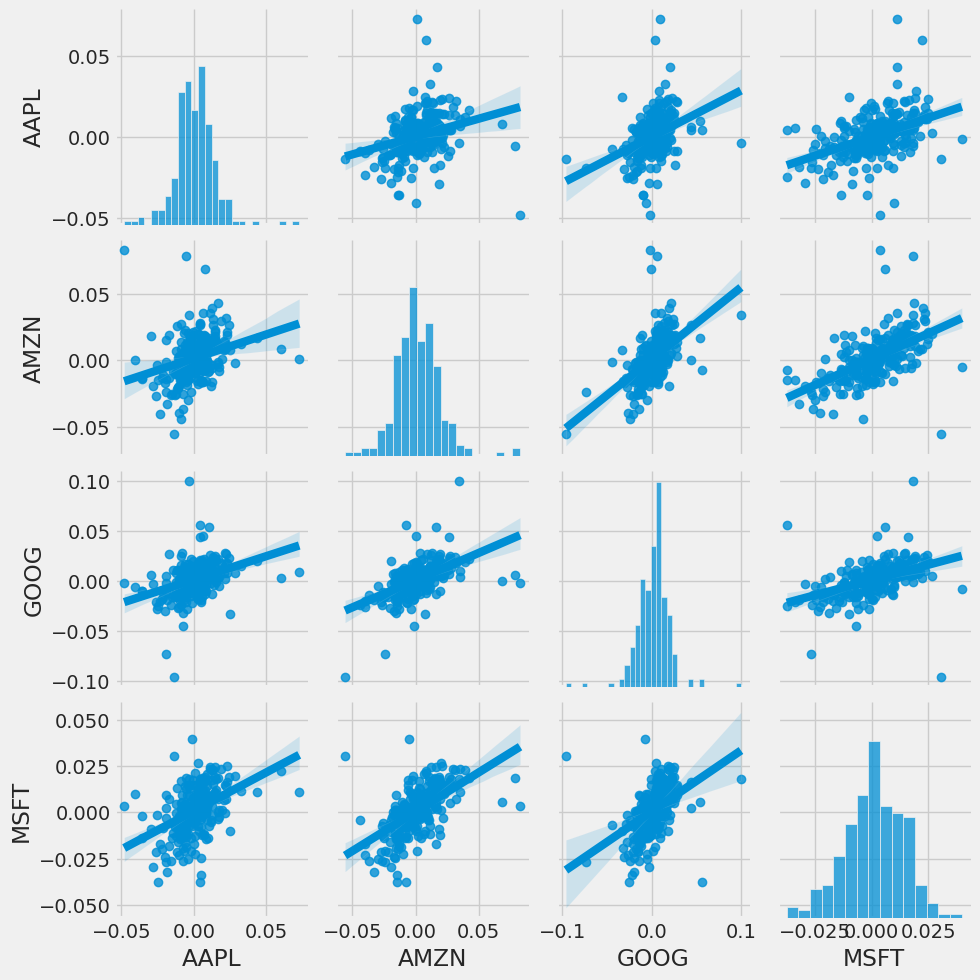

In [11]:
# We can simply call pairplot on our DataFrame for an automatic visual analysis
# of all the comparisons

sns.pairplot(tech_rets, kind='reg')

Finally, we could also do a correlation plot, to get actual numerical values for the correlation between the stocks' daily return values.

Text(0.5, 1.0, 'Correlation of stock closing price')

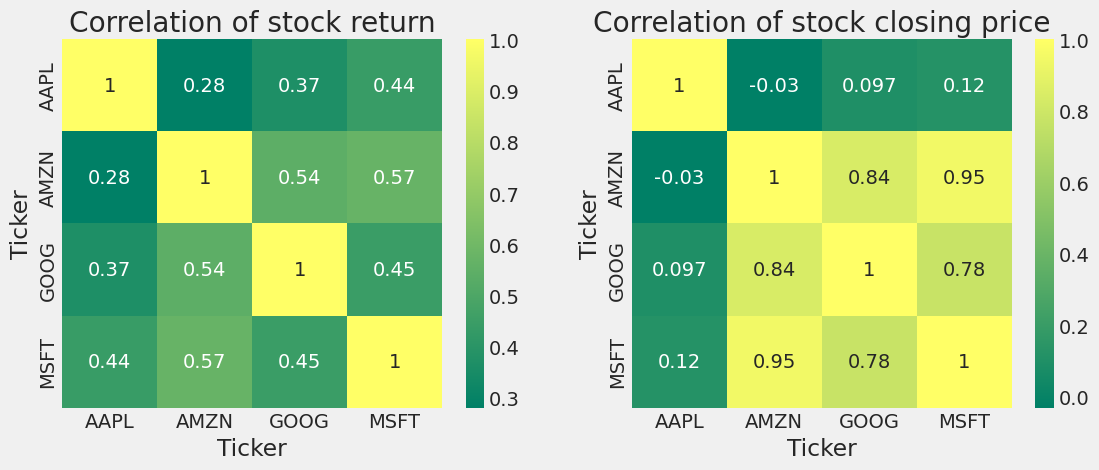

In [12]:
plt.figure(figsize=(12, 10))

plt.subplot(2, 2, 1)
sns.heatmap(tech_rets.corr(), annot=True, cmap='summer')
plt.title('Correlation of stock return')

plt.subplot(2, 2, 2)
sns.heatmap(closing_df.corr(), annot=True, cmap='summer')
plt.title('Correlation of stock closing price')

# 5. Predicting the closing price stock price of APPLE inc:

In [13]:
# Get the stock quote
df = pdr.get_data_yahoo('AAPL', start='2012-01-01', end=datetime.now())
# Show teh data
df

[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2012-01-03,14.621429,14.732143,14.607143,14.686786,12.433825,302220800
2012-01-04,14.642857,14.810000,14.617143,14.765714,12.500648,260022000
2012-01-05,14.819643,14.948214,14.738214,14.929643,12.639430,271269600
2012-01-06,14.991786,15.098214,14.972143,15.085714,12.771557,318292800
2012-01-09,15.196429,15.276786,15.048214,15.061786,12.751301,394024400
...,...,...,...,...,...,...
2024-06-10,196.899994,197.300003,192.149994,193.119995,193.119995,97262100
2024-06-11,193.649994,207.160004,193.630005,207.149994,207.149994,172373300
2024-06-12,207.369995,220.199997,206.899994,213.070007,213.070007,198134300


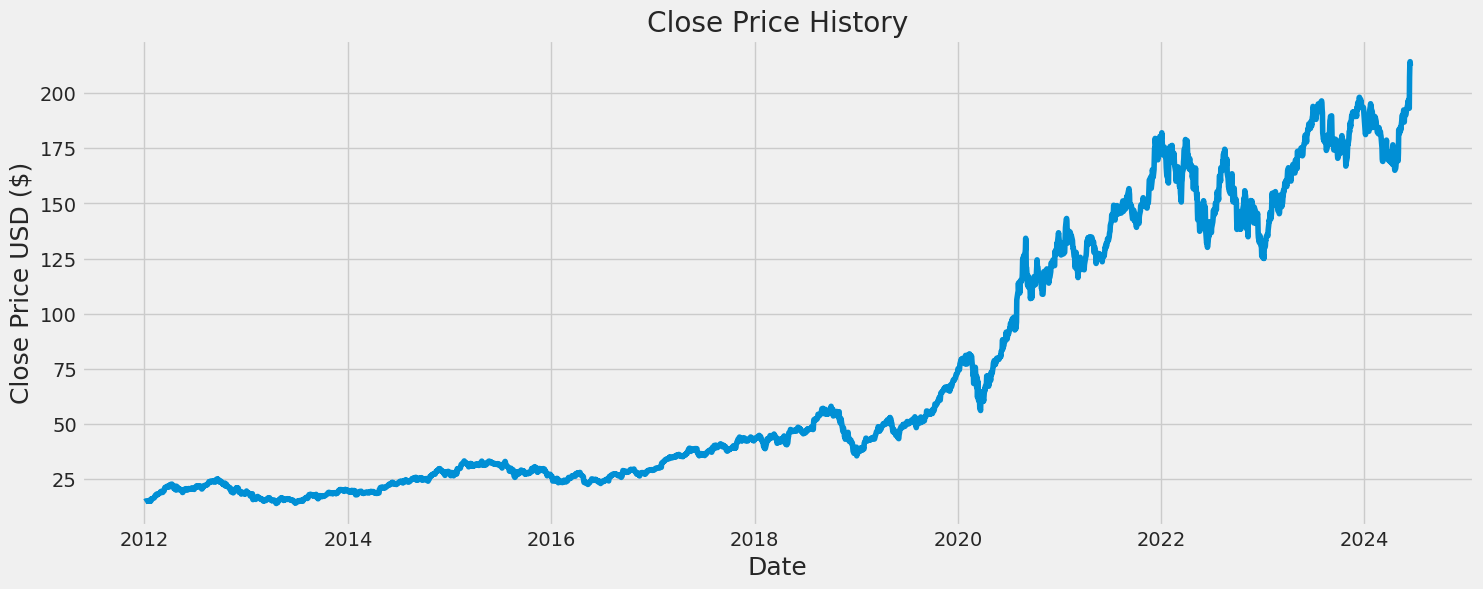

In [14]:
plt.figure(figsize=(16,6))
plt.title('Close Price History')
plt.plot(df['Close'])
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.show()

In [15]:
# Create a new dataframe with only the 'Close column
data = df.filter(['Close'])
# Convert the dataframe to a numpy array
dataset = data.values
# Get the number of rows to train the model on
training_data_len = int(np.ceil( len(dataset) * .95 ))

training_data_len

2977

In [16]:
# Scale the data
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)

scaled_data

array([[0.00369103],
       [0.00408509],
       [0.00490354],
       ...,
       [0.99415855],
       [1.        ],
       [0.99126278]])

In [17]:
# Create the training data set
# Create the scaled training data set
train_data = scaled_data[0:int(training_data_len), :]
# Split the data into x_train and y_train data sets
x_train = []
y_train = []

for i in range(60, len(train_data)):
    x_train.append(train_data[i-60:i, 0])
    y_train.append(train_data[i, 0])
    if i<= 61:
        print(x_train)
        print(y_train)
        print()

# Convert the x_train and y_train to numpy arrays
x_train, y_train = np.array(x_train), np.array(y_train)

# Reshape the data
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
# x_train.shape

[array([0.00369103, 0.00408509, 0.00490354, 0.00568276, 0.00556329,
       0.00583254, 0.0057095 , 0.00550266, 0.00522093, 0.00609287,
       0.00687922, 0.00663672, 0.0053083 , 0.00657609, 0.00532792,
       0.01000857, 0.00964661, 0.01011913, 0.01114085, 0.01175958,
       0.01170787, 0.01151708, 0.01233018, 0.01309513, 0.01396172,
       0.01536146, 0.0183018 , 0.01834638, 0.01998328, 0.02120648,
       0.01910421, 0.01991373, 0.01989769, 0.02216758, 0.02184483,
       0.02244217, 0.0235156 , 0.02411295, 0.02583365, 0.02708716,
       0.02744914, 0.02757574, 0.02543245, 0.02491534, 0.02499202,
       0.02700693, 0.02757396, 0.02879182, 0.03166262, 0.03549273,
       0.03477592, 0.0347777 , 0.03754687, 0.03841347, 0.0377965 ,
       0.03723305, 0.0366464 , 0.03859533, 0.03993267, 0.04049256])]
[0.03910887127711825]

[array([0.00369103, 0.00408509, 0.00490354, 0.00568276, 0.00556329,
       0.00583254, 0.0057095 , 0.00550266, 0.00522093, 0.00609287,
       0.00687922, 0.00663672, 0.00

In [ ]:
from keras.models import Sequential
from keras.layers import Dense, LSTM

# Build the LSTM model
model = Sequential()
model.add(LSTM(128, return_sequences=True, input_shape= (x_train.shape[1], 1)))
model.add(LSTM(64, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(x_train, y_train, batch_size=1, epochs=1)

 407/2917 [===>..........................] - ETA: 2:40 - loss: 0.0044

In [ ]:
# Create the testing data set
# Create a new array containing scaled values from index 1543 to 2002
test_data = scaled_data[training_data_len - 60: , :]
# Create the data sets x_test and y_test
x_test = []
y_test = dataset[training_data_len:, :]
for i in range(60, len(test_data)):
    x_test.append(test_data[i-60:i, 0])

# Convert the data to a numpy array
x_test = np.array(x_test)

# Reshape the data
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1 ))

# Get the models predicted price values
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

# Get the root mean squared error (RMSE)
rmse = np.sqrt(np.mean(((predictions - y_test) ** 2)))
rmse

In [ ]:
# Plot the data
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions
# Visualize the data
plt.figure(figsize=(16,6))
plt.title('Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')
plt.show()

In [ ]:
# Show the valid and predicted prices
valid

# 6. Stock Trading Using Deep Q-Learning

We prepared an agent by implementing Deep Q-Learning that can perform unsupervised trading in stock trade. The aim of this part is to train an agent that uses Q-learning and neural networks to predict the profit or loss by building a model and implementing it on a dataset that is available for evaluation.

The stock trading index environment provides the agent with a set of actions:

Buy     Sell     Sit



### **Import the libraries**

In [ ]:
import numpy as np
import pandas as pd

In [ ]:
import keras
from keras.models import Sequential
from keras.models import load_model
from keras.layers import Dense
from keras.optimizers import Adam
import numpy as np
import random
from collections import deque

### **Create a DQN agent**

**We used the steps below to prepare an agent**

* Action space include 3 actions: Buy, Sell, and Sit
* Setting up the experience replay memory to deque with 1000 elements inside it
* Empty list with inventory is created that contains the stocks that were already bought
* Setting up gamma to 0.95, that helps to maximize the current reward over the long-term
* Epsilon parameter determines whether to use a random action or to use the model for the action.
* In the beginning random actions are encouraged, hence epsilon is set up to 1.0 when the model is not trained.
* And over time the epsilon is reduced to 0.01 in order to decrease the random actions and use the trained model
* We're then set the speed of decreasing epsililon in the epsilon_decay parameter
* Defining our neural network:
* Define the neural network function called _model and it just takes the keyword self
* Define the model with Sequential()
* Define states i.e. the previous n days and stock prices of the days
* Defining 3 hidden layers in this network
* Changing the activation function to relu because mean-squared error is used for the loss

In [ ]:
#Temporal Difference formula for Q Learning
GAMMA=0.95
LEARNING_RATE = 0.001
# memory
MEMORY_SIZE = 1000

# E-Greedy Stratergy
EPSILON_MAX=1.0
EPSILON_MIN=0.01
EPSILON_DECAY=0.995

In [ ]:
class Agent:
    def __init__(self,window_size,is_eval=False,model_name=""):
        self.state_size = window_size
        self.epsilon_max = EPSILON_MAX
        self.action_size = 3 #Buy,Sell,Sit
        self.memory=deque(maxlen=MEMORY_SIZE)
        self.inventory=[]
        self.model= load_model("/content/" + model_name) if is_eval else self._model()

    def _model(self):
        model=Sequential()
        model.add(Dense(64, input_shape=(window_size,), activation="relu"))
        model.add(Dense(32, activation="relu"))
        model.add(Dense(8, activation="relu"))
        model.add(Dense(self.action_size, activation="linear"))
        model.compile(loss="mse", optimizer=Adam(learning_rate=LEARNING_RATE))
        return model

    def remember(self, state, action, reward, next_state, done):
        self.memory.append((state,action, reward, next_state, done))

    def act(self,state):
        if np.random.rand() <= self.epsilon_max:
            return random.randrange(self.action_size)

        #Exploitation
        q_values = self.model.predict(state)
        return np.argmax(q_values[0])

    def expReplay(self,batch_size):
        if len(self.memory) < batch_size:
            return
        batch = random.sample(self.memory, batch_size) #To avoid bias
        for state, action, reward, state_next, terminal in batch:
            q_update = reward
            if not terminal:
                q_update = (reward + GAMMA * np.amax(self.model.predict(state_next)[0]))

            q_values = self.model.predict(state)
            q_values[0][action] = q_update
            self.model.fit(state, q_values, verbose=0)

            self.epsilon_max *= EPSILON_DECAY
            self.epsilon_max = max(EPSILON_MIN, self.epsilon_max)



### **Preprocess the stock market data**

In [ ]:
import math

# prints formatted price
def formatPrice(n):
	return ("-$" if n < 0 else "$") + "{0:.2f}".format(abs(n))

# returns the vector containing stock data from a fixed file
def getStockDataVec(key):
	vec = []
	lines = open("/content/" + key + ".csv", "r").read().splitlines()

	for line in lines[1:]:
		vec.append(float(line.split(",")[4]))

	return vec

# returns the sigmoid
def sigmoid(x):
	return 1 / (1 + math.exp(-x))

# returns an an n-day state representation ending at time t
# n is the window_size
def getState(data, t, n):
	d = t - n + 1
	block = data[d:t + 1] if d >= 0 else -d * [data[0]] + data[0:t + 1] # pad with t0
	res = []
	for i in range(n - 1):
		res.append(sigmoid(block[i + 1] - block[i]))

	return np.array([res])

### **Train and build the model**

In [ ]:
import sys

if len(sys.argv) != 4:
	print ("Usage: python train.py [stock] [window] [episodes]")
	exit()

stock_name = input("Enter stock_name, window_size, Episode_count")

#Details:
#Enter stock_name = GSPC_Training_Dataset
#window_size = 10
#Episode_count = 100 or it can be 10 or 20 or 30 and so on.

window_size = input()
episode_count = input()
stock_name = str(stock_name)
window_size = int(window_size)
episode_count = int(episode_count)

agent = Agent(window_size)
data = getStockDataVec(stock_name)
#l = len(data) - 1
l=10
batch_size = 32

for e in range(episode_count + 1):
	print ("Episode " + str(e) + "/" + str(episode_count))
	state = getState(data, 0, window_size + 1)

	total_profit = 0
	agent.inventory = []

	for t in range(l):
		action = agent.act(state)

		# sit
		next_state = getState(data, t + 1, window_size + 1)
		reward = 0

		if action == 1: # buy
			agent.inventory.append(data[t])
			print ("Buy: " + formatPrice(data[t]))

		elif action == 2 and len(agent.inventory) > 0: # sell
			bought_price = agent.inventory.pop(0)
			reward = max(data[t] - bought_price, 0)
			total_profit += data[t] - bought_price
			print ("Sell: " + formatPrice(data[t]) + " | Profit: " + formatPrice(data[t] - bought_price))

		done = True if t == l - 1 else False
		agent.memory.append((state, action, reward, next_state, done))
		state = next_state

		if done:
			print ("--------------------------------")
			print ("Total Profit: " + formatPrice(total_profit))


		if len(agent.memory) > batch_size:
			agent.expReplay(batch_size)

	#if e % 10 == 0:
		agent.model.save("model_ep" + str(e))

In [ ]:
import sys
from keras.models import load_model


if len(sys.argv) != 3:
	print ("Usage: python evaluate.py [stock] [model]")
	exit()


stock_name = input("Enter Stock_name, Model_name")
model_name = input()
#Note:
#Fill the given information when prompted:
#Enter stock_name = GSPC_Evaluation_Dataset
#Model_name = respective model name

model = load_model("" + model_name)
window_size = model.layers[0].input.shape.as_list()[1]

agent = Agent(window_size, True, model_name)
data = getStockDataVec(stock_name)
l = len(data) - 1
batch_size = 32

state = getState(data, 0, window_size + 1)
total_profit = 0
agent.inventory = []

for t in range(l):
	action = agent.act(state)

	# sit
	next_state = getState(data, t + 1, window_size + 1)
	reward = 0

	if action == 1: # buy
		agent.inventory.append(data[t])
		print ("Buy: " + formatPrice(data[t]))

	elif action == 2 and len(agent.inventory) > 0: # sell
		bought_price = agent.inventory.pop(0)
		reward = max(data[t] - bought_price, 0)
		total_profit += data[t] - bought_price
		print ("Sell: " + formatPrice(data[t]) + " | Profit: " + formatPrice(data[t] - bought_price))

	done = True if t == l - 1 else False
	agent.memory.append((state, action, reward, next_state, done))
	state = next_state

	if done:
		print ("--------------------------------")
		print (stock_name + " Total Profit: " + formatPrice(total_profit))